In [1]:
# this doc is aim to try and see the result of different model, turns out that random forest and gradainboost is not good
#support vector regression is better
import pandas as pd
import numpy as np
import time
import random

In [2]:
from datetime import datetime, timedelta

In [3]:
full_set = pd.read_json('full_set.json')

In [4]:
full_set = full_set.dropna(how='any')

In [5]:
full_set.sort_values(by = 'Date',inplace = True)

In [6]:
full_set.set_index(full_set.Date,inplace = True)

In [7]:
full_set['ewma_exp_senti'] = pd.ewma(full_set["exp_senti"], span=30, freq="D")
full_set['ewma_expsstd'] = pd.ewma(full_set["exp_senti_std"], span=30, freq="D")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


In [8]:
full_set

,10d_p,Close,Date,Volume,exp_senti,exp_senti_std,ewma_exp_senti,ewma_expsstd
Date,,,,,,,,
2015-01-01,265.66,314.25,2015-01-01,8036550,0.931250,1.946381,0.931250,1.946381
2015-01-02,267.80,315.03,2015-01-02,7860650,0.010345,2.320574,0.455449,2.139714
2015-01-03,225.86,281.08,2015-01-03,33054400,1.302632,2.544187,0.756872,2.283623
2015-01-04,178.10,264.20,2015-01-04,55629100,-0.075758,0.869702,0.527452,1.894036
2015-01-05,209.84,274.47,2015-01-05,43962800,0.215385,2.234639,0.456449,1.971532
2015-01-06,208.10,286.19,2015-01-06,23245700,0.126471,1.183790,0.391894,1.817422
2015-01-07,199.26,294.34,2015-01-07,24866800,0.751613,2.462214,0.454110,1.928943
2015-01-08,210.34,283.35,2015-01-08,19982500,0.387097,1.753106,0.443653,1.901506
2015-01-09,214.86,290.41,2015-01-09,18718600,64.248151,322.822413,9.564691,47.778081


In [155]:
train_set = full_set.loc[(datetime(2015,1,1)):(datetime(2017,10,1)),:]

In [175]:
train_target

Date
2015-01-01     265.66
2015-01-02     267.80
2015-01-03     225.86
2015-01-04     178.10
2015-01-05     209.84
2015-01-06     208.10
2015-01-07     199.26
2015-01-08     210.34
2015-01-09     214.86
2015-01-10     211.32
2015-01-11     226.90
2015-01-12     233.41
2015-01-13     232.88
2015-01-16     273.47
2015-01-17     263.48
2015-01-18     233.92
2015-01-19     233.51
2015-01-20     226.43
2015-01-21     217.46
2015-01-22     226.97
2015-01-23     238.23
2015-01-24     227.27
2015-01-25     226.85
2015-01-26     217.11
2015-01-27     222.27
2015-01-28     227.75
2015-01-29     223.41
2015-01-30     220.11
2015-01-31     219.84
2015-02-01     219.19
               ...   
2017-09-02    4130.81
2017-09-03    3882.59
2017-09-04    3154.95
2017-09-05    3637.52
2017-09-06    3625.04
2017-09-07    3582.88
2017-09-08    4065.20
2017-09-09    3924.97
2017-09-10    3905.95
2017-09-11    3631.04
2017-09-12    3630.70
2017-09-13    3792.40
2017-09-14    3682.84
2017-09-15    3926.07
2017-

In [156]:
train_set

,10d_p,Close,Date,Volume,exp_senti,exp_senti_std,ewma_exp_senti,ewma_expsstd
Date,,,,,,,,
2015-01-01,265.66,314.25,2015-01-01,8036550,0.931250,1.946381,0.931250,1.946381
2015-01-02,267.80,315.03,2015-01-02,7860650,0.010345,2.320574,0.455449,2.139714
2015-01-03,225.86,281.08,2015-01-03,33054400,1.302632,2.544187,0.756872,2.283623
2015-01-04,178.10,264.20,2015-01-04,55629100,-0.075758,0.869702,0.527452,1.894036
2015-01-05,209.84,274.47,2015-01-05,43962800,0.215385,2.234639,0.456449,1.971532
2015-01-06,208.10,286.19,2015-01-06,23245700,0.126471,1.183790,0.391894,1.817422
2015-01-07,199.26,294.34,2015-01-07,24866800,0.751613,2.462214,0.454110,1.928943
2015-01-08,210.34,283.35,2015-01-08,19982500,0.387097,1.753106,0.443653,1.901506
2015-01-09,214.86,290.41,2015-01-09,18718600,64.248151,322.822413,9.564691,47.778081


In [157]:
test_set = full_set.drop(train_set.index)

In [158]:
test_set

,10d_p,Close,Date,Volume,exp_senti,exp_senti_std,ewma_exp_senti,ewma_expsstd
Date,,,,,,,,
2017-10-02,5446.91,4409.32,2017-10-02,1431730000,18.200000,90.682964,13.236951,55.504011
2017-10-03,5647.21,4317.48,2017-10-03,1288020000,-1.207693,154.261293,12.305035,61.875472
2017-10-04,5831.79,4229.36,2017-10-04,1116770000,10.174286,59.183620,12.167567,61.701804
2017-10-05,5678.19,4328.41,2017-10-05,1161770000,12.028948,41.731731,12.158623,60.413408
2017-10-06,5725.59,4370.81,2017-10-06,1069940000,5.204546,10.645207,11.709972,57.202547
2017-10-07,5605.51,4426.89,2017-10-07,906928000,5.472222,24.114111,11.307535,55.067803
2017-10-08,5590.69,4610.48,2017-10-08,1313870000,0.853571,2.596217,10.633084,51.682530
2017-10-09,5708.52,4772.02,2017-10-09,1968740000,11.245946,67.134443,10.672624,52.679430
2017-10-10,6011.45,4781.99,2017-10-10,1597140000,1.435294,8.347134,10.076666,49.819276


In [159]:
train_target = train_set['10d_p']

In [160]:
train_predictor = train_set[['ewma_exp_senti','ewma_expsstd']]

In [161]:
Y = train_target.as_matrix()
X = train_predictor.as_matrix()

In [162]:
test_target = test_set['10d_p']

In [163]:
test_predictor = test_set[['ewma_exp_senti','ewma_expsstd']]

In [164]:
test_X = test_predictor.as_matrix()
test_Y = test_target.as_matrix()

In [165]:
f_X = full_set[['ewma_exp_senti','ewma_expsstd']]
f_Y = full_set['10d_p']

In [166]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor()

rf_regression.fit(train_predictor,train_target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [167]:
from sklearn.svm import SVR
clf = SVR(kernel='linear',gamma='auto')
clf.fit(train_predictor,train_target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [168]:
compare = pd.DataFrame(data = test_target)

In [169]:
compare['predict'] = clf.predict(test_predictor)

In [170]:
clf.predict(test_predictor)

array([  5121.85412289,   5686.67456328,   5669.41901403,   5552.95030911,
         5257.82473649,   5060.42077573,   4746.96375723,   4837.45429475,
         4572.32180741,   5184.41474306,   5141.37462626,   5226.46143462,
         4916.11179457,   4745.38826055,   4481.67962348,   4597.94709108,
         4341.40948411,   5141.52932176,   4929.63163342,   5589.52757915,
         5335.29599504,   5253.94627984,   5085.94994862,   5014.22940371,
         4796.49733603,   4845.8303666 ,   5467.57839897,   5386.26103363,
         5076.30210421,   5914.49909803,   5997.2046887 ,   5874.73914711,
         5902.38335065,   6172.20902909,   5808.15529804,   5784.22653917,
         5482.46221451,   5852.14725831,   6516.99384853,   6464.79828949,
         6520.6773687 ,   6265.18692614,   5876.00136477,   5813.70134286,
         5490.54628169,   5696.45348477,   6055.48392363,   5813.98004169,
         6167.24067638,   6079.12187722,   5990.90172212,   6008.13424004,
         5718.06506693,  

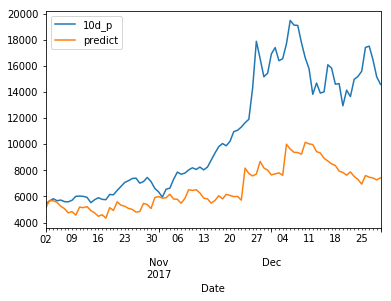

In [171]:
%matplotlib inline
compare.plot(y=['10d_p','predict'])

In [ ]:
param_grid_clf = [
    {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02,0.05, 0.1, 0.2], 'n_estimators': [50,100,200,300,400,800], 'max_features': ['log2', 'sqrt','auto']}
]

GBR = GradientBoostingRegressor()
grid_search = GridSearchCV(GBR, param_grid_GBR, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, Y)

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [26]:
rfr_scores = cross_val_score(rf_regression,f_X, f_Y,
                             scoring="neg_mean_squared_error", cv=5)
display_scores(rfr_scores)

Scores: [ -7.52183008e+05  -5.81723420e+04  -5.02966747e+04  -6.21838503e+05
  -6.02481169e+07]
Mean: -12346121.4953
Standard deviation: 23952705.0335


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 16 (4×4) combinations of hyperparameters
    {'n_estimators': [5, 20, 10, 50,100], 'max_features': ['auto', 'log2', 'sqrt']},
    # then try 12 (3×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [5, 10, 20,100], 'max_features': ['auto','log2', 'sqrt']},
  ]

rf_regression = RandomForestRegressor()
# train across 5 folds, we have about 700 case, split them to 5 folds should good enough
grid_search = GridSearchCV(rf_regression, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(f_X, f_Y)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
rf_regression2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf_regression2.fit(train_predictor,train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
rfr2_scores = cross_val_score(rf_regression2,f_X, f_Y,
                             scoring="neg_mean_squared_error", cv=5)
display_scores(rfr2_scores)

Scores: [ -6.86701087e+05  -4.75580928e+04  -5.04844910e+04  -6.00235221e+05
  -6.01282814e+07]
Mean: -12302652.0534
Standard deviation: 23914307.9957


In [172]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(train_predictor,train_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

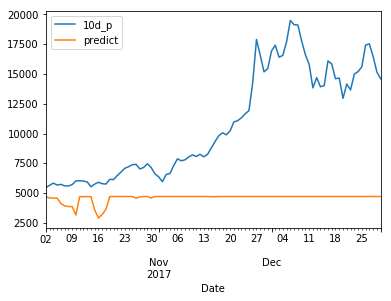

In [173]:
compare = pd.DataFrame(data = test_target)
compare['predict'] = GBR.predict(test_predictor)
compare.plot(y=['10d_p','predict'])

In [71]:
param_grid_GBR = [
    {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02,0.05, 0.1, 0.2], 'n_estimators': [50,100,200,300,400,800], 'max_features': ['log2', 'sqrt','auto']}
]

GBR = GradientBoostingRegressor()
grid_search = GridSearchCV(GBR, param_grid_GBR, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 200, 300, 400, 800], 'max_features': ['log2', 'sqrt', 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [74]:
GBR2 = GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 200, 300, 400, 800], 'max_features': ['log2', 'sqrt', 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

GBR2.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 200, 300, 400, 800], 'max_features': ['log2', 'sqrt', 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [44]:
train_predictor

,ewma_exp_senti,ewma_expsstd
Date,,
2017-06-02,4.879591,18.386666
2017-06-03,4.938086,18.292726
2017-06-04,4.678622,17.223811
2017-06-05,4.756348,16.880018
2017-06-06,4.519427,16.245734
2017-06-07,4.493555,15.841732
2017-06-08,4.659503,15.669441
2017-06-09,4.496891,15.603215
2017-06-10,4.327627,15.002322


In [22]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(train_predictor,train_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')